<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aulas_exploratorias/Aula03/Explora%C3%A7%C3%A3o_TB_PR(16_07)_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nessa análise, trabalhamos com dados em formato de data. 

Basicamente, podemos especificar que uma variável está em formato de  data e usar essa informação para extrair significados interessantes do nosso conjunto de dados

In [1]:
import pandas as pd

Lendo o banco do GitHub

In [2]:
url = 'https://github.com/souzajvp/teaching-python/raw/main/dataset/tb_pr_sinan_organizado.zip'

In [3]:
dados = pd.read_csv(url, compression='zip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38,61,85,86,87,88,89,90,91,92,93,94,95,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Vamos trabalhar com a data de nascimento dos indivíduos no estudo.

Vamos inspecionar como esses valores estão armazenados na coluna `DT_NASC`.

In [4]:
dados['DT_NASC'][0]

19611202.0

Na data de nascimento acima vemos que os dados estão em formato numérico. Mais especificamente em formato *float* (decimal).

Temos os números "grudados" para ano (1996), mês (11) e dia (02)

Para transformar um valor em data, usaremos a o método `pd.datetime()` do pandas. Para isso, precisamos também especificar o formato dos números (ex: AAAAmmdd).

Obs: existem muitos especificadores para trabalhar com informações de tempo. Alguns muito usados são %Y(ano, ex: 1992), %m (mês numérico, ex:11) e %d (dia numérico, ex:02)

**Vamos fazer um exemplo usando a minha data de nascimento**: 19951207

In [5]:
pd.to_datetime(19951207, format='%Y%m%d')

Timestamp('1995-12-07 00:00:00')

Prontinho! Agora os dados foram transformados para o formato "Timestamp", que é o padrão para dados de data/tempo.

**Mas e se tivéssemos um dado com barras ou traços**, tipo: '1995-12-07' ou '1995/12/07'?

In [6]:
pd.to_datetime('1995-12-07', format='%Y-%m-%d')

Timestamp('1995-12-07 00:00:00')

In [7]:
pd.to_datetime('1995/12/07', format='%Y/%m/%d')


Timestamp('1995-12-07 00:00:00')

Como podemos ver acima, basta modificar o argumento `format`, incluindo os separadores entre especificadores para corrigir o problema.

## Calculando a idade dos pacientes
Para fazer a alteração de uma variável, basta passarmos a seleção da variável e o format.

Para ter certeza do formato dos dados, vamos visualizar novamente um dos elementos presentes.

In [8]:
dados['DT_NASC'][0]

19611202.0

Agora, sabendo do formato dos números, podemos executar a transformação.

In [9]:
pd.to_datetime(dados['DT_NASC'], format='%Y%m%d')

0       1961-12-02
1       1974-05-05
2       1955-05-29
3       1966-11-28
4       1960-03-12
           ...    
57426   1995-09-04
57427   1985-03-29
57428   1976-01-16
57429   2003-06-12
57430   1966-03-12
Name: DT_NASC, Length: 57431, dtype: datetime64[ns]

Agora precisamos renomear a variável para armazenar os resultados na nossa variável `DT_NASC`

In [10]:
dados['DT_NASC'] = pd.to_datetime(dados['DT_NASC'], format='%Y%m%d')

Agora que temos a data de nascimento dos pacientes, **precisamos fazer a mesma coisa para a data de diagnóstico.**

In [11]:
dados['DT_DIAG'] = pd.to_datetime(dados['DT_DIAG'], format='%Y%m%d')

Para calcular a idade no momento de diagnóstico, podemos subtrair: DT_DIAG - DT_NASC

In [12]:
dados['DT_DIAG'] - dados['DT_NASC']

0       14278 days
1        9788 days
2       16660 days
3       12469 days
4       14951 days
           ...    
57426    9249 days
57427   13060 days
57428   16420 days
57429    6411 days
57430   20017 days
Length: 57431, dtype: timedelta64[ns]

In [13]:
dados['idade_dias'] = dados['DT_DIAG'] - dados['DT_NASC']

Essa operação nos da o resultado em dias, porém para nós faz mais sentido que seja em anos.

Para fazer a alteração para anos, podemos dividir a idade em dias por `np.timedelta(1, 'Y')`

In [14]:
import numpy as np

In [15]:
dados['idade_dias'] / np.timedelta64(1, 'Y')

0        39.091836
1        26.798634
2        45.613531
3        34.138962
4        40.934448
           ...    
57426    25.322902
57427    35.757066
57428    44.956433
57429    17.552722
57430    54.804685
Name: idade_dias, Length: 57431, dtype: float64

Adicionando a nova variável `idade`

In [16]:
dados['idade'] = dados['idade_dias'] / np.timedelta64(1, 'Y')

In [17]:
dados['idade']

0        39.091836
1        26.798634
2        45.613531
3        34.138962
4        40.934448
           ...    
57426    25.322902
57427    35.757066
57428    44.956433
57429    17.552722
57430    54.804685
Name: idade, Length: 57431, dtype: float64

Assim, temos a idade dos pacientes em anos.

Para finalizar, temos que s**elecionar apenas os números inteiros**.

Para fazer isso, teremos que fazer algumas correções devido a presença de valores nulos no nosso banco de dados.

1. Primeiro preencheremos os valores nulos com um valor qualquer (999) usando o método `.fillna(999)`;
2. Aí sim transformaremos os dados em inteiros usando método `.astype(int)`;
3. Por fim, vamos substituir os valores 999 novamente por valores nulos usado o método `.replace(999, np.nan)`

Checando valores nulos

In [18]:
dados['DT_NASC'].isna().sum()

172

Preencher valores nulos com 999

In [19]:
dados['idade'] = dados['idade'].fillna(999)

Após preencher com 999, é então possível mudar os dados para formato inteiro

In [20]:
dados['idade'] = dados['idade'].astype(int)

Volto a classificação de nulo para as pessoas que tinham 999 anos

In [21]:
dados['idade'] = dados['idade'].replace([999], [np.nan])

**Finalmente temos a idade dos nossos pacientes!!**

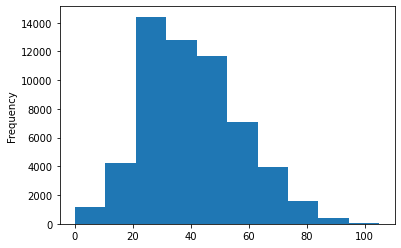

In [22]:
dados['idade'].plot(kind='hist')

Agora sim podemos entender melhor quais eram as idades dos individuos com TB no PR. Com o método describe() temos as estatísticas descritivas do nosso conjunto

In [23]:
dados['idade'].describe()

count    57259.000000
mean        40.050612
std         16.627037
min          0.000000
25%         27.000000
50%         38.000000
75%         51.000000
max        105.000000
Name: idade, dtype: float64

Podemos ver que a média de idade das pessoas afetadas com TB foi de 40 anos. Além disso, 50% dos 75% dos pacientes tinha 51 anos ou menos!!!

Agora, tendo a idade dos nossos pacientes, podemos começar a interpretar oe feito da idade em outra variáveis.

In [24]:
dados.groupby('CS_ESCOL_N').mean()[['idade']]

,idade
CS_ESCOL_N,
1ª a 4ª série incompleta do EF,47.195122
4ª série completa do EF,44.966649
5ª à 8ª série incompleta do EF,37.123646
Analfabeto,54.044424
Educação superior completa,39.508266
Educação superior incompleta,32.380747
Ensino fundamental completo,37.964381
Ensino médio completo,36.624058
Ensino médio incompleto,32.937864


Na tabela acima, agrupei os dados por escolaridade, calculei a média dos dados e selecionei apenas a variável idade.

## Desafios

<font color='red'>**Desafio 01.** </font>Crie uma variável com sua data de nascimento e depois transforme ela para o formato data usando o pd.to_datetime().

<font color='red'>**Desafio 02.** </font> Transforme a variável 'DT_INIC_TR' para o formato de data e a insira novamente no banco

<font color='red'>**Desafio 03.** </font> Agora temos as variáveis DT_DIAG e DT_INIC_TR em formato de data. **Calcule a diferença entre o início do tratamento e a data de diagnóstico**. Em seguida, crie uma nova variável para inseri-la no banco de dados

Obs: após fazer a subtração, você vai precisar dividir a nova variável por `np.timedelta64(1, 'D')` para transforma-lá em um número de dias.

<font color='red'>**Desafio 04.** </font> A partir da nova variável, faça um histograma como o que fizemos para a idade dos pacientes.

Adicione ao gráfico:
1. Nome para o eixo X;
2. Nome para o eixo Y;
3. Titulo adequado

<font color='red'>**Desafio 05.** </font> Use o método .describe() para visualizar as estatísticas descritivas da nova variável criada